<a href="https://colab.research.google.com/github/glarmour/Congressional-Analytics/blob/main/Remotework_Impact_on_HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import needed packages
!pip uninstall pyjanitor --yes
!pip install pyjanitor==0.23.1
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
import plotly.express as px
from urllib import request
import json
import numpy as np
import seaborn as sns
import janitor
import datetime



Found existing installation: pyjanitor 0.23.1
Uninstalling pyjanitor-0.23.1:
  Successfully uninstalled pyjanitor-0.23.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyjanitor-0.23.1-py3-none-any.whl (147 kB)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Import work form home and relocation data
url2021="https://api.census.gov/data/2021/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"
url2019="https://api.census.gov/data/2019/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"
url2018="https://api.census.gov/data/2018/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"
url2017="https://api.census.gov/data/2017/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"
url2016="https://api.census.gov/data/2016/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"

response2021 = urlopen(url2021)
response2019 = urlopen(url2019)
response2018 = urlopen(url2018)
response2017 = urlopen(url2017)
response2016 = urlopen(url2016)
data_json2021 = json.loads(response2021.read())
data_json2019 = json.loads(response2019.read())
data_json2018 = json.loads(response2018.read())
data_json2017 = json.loads(response2017.read())
data_json2016 = json.loads(response2016.read())
data_json2021.pop(0)
data_json2019.pop(0)
data_json2018.pop(0)
data_json2017.pop(0)
data_json2016.pop(0)
cols = ['District Name','worked_from_home','moved_in_within_state','moved_in_diff_state','population','employed','population_1_year_ago','moved_out_same_state','moved_out_diff_state','State code', 'County Code']
data2021 = pd.DataFrame(data_json2021, columns = cols)
data2021['year'] =2021
data2019 = pd.DataFrame(data_json2019, columns = cols)
data2019['year'] =2019
data2018 = pd.DataFrame(data_json2018, columns = cols)
data2018['year'] =2018
data2017 = pd.DataFrame(data_json2017, columns = cols)
data2017['year'] =2017
data2016 = pd.DataFrame(data_json2016, columns = cols)
data2016['year'] =2016
data5years = pd.concat([data2021,data2019,data2018,data2017,data2016],ignore_index=True, axis=0)
data5years[['County', 'State']] = data5years['District Name'].str.split(',', expand=True)
data5years['State'] = data5years['State'].str.strip()
data5years['County'] = data5years['County'].str.strip()
wfh_relocation_df = data5years[['year','population','employed','worked_from_home','moved_in_within_state','moved_in_diff_state','population_1_year_ago','moved_out_same_state','moved_out_diff_state','County', 'State']]
wfh_relocation_df.head(100)

,year,population,employed,worked_from_home,moved_in_within_state,moved_in_diff_state,population_1_year_ago,moved_out_same_state,moved_out_diff_state,County,State
0,2021,67877,28169,None,None,None,69889,4793,947,Shiawassee County,Michigan
1,2021,369390,174615,54266,24727,15823,356001,15938,18232,Washtenaw County,Michigan
2,2021,153268,80076,None,None,None,151049,7680,3479,Scott County,Minnesota
3,2021,144845,71595,None,None,None,144598,6711,3093,Wright County,Minnesota
4,2021,209396,75422,None,5988,10858,207629,9190,10124,Harrison County,Mississippi
...,...,...,...,...,...,...,...,...,...,...,...
95,2021,79988,30373,None,None,None,None,None,None,Umatilla County,Oregon
96,2021,1238090,567530,158528,22898,33225,1226426,30092,33091,Allegheny County,Pennsylvania
97,2021,132167,50080,6160,2970,1455,129326,2239,1119,Cambria County,Pennsylvania
98,2021,157527,68239,14244,10505,8376,144915,4882,3515,Centre County,Pennsylvania


In [ ]:
#Import house sales data
housing_df = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1677108411")
state_abbr_to_name = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas','CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 
'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 
'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 
'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 
'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}
housing_df['State'] = housing_df['State'].map(state_abbr_to_name)
housing_df.rename(columns = {'RegionName':'County'}, inplace = True)

# Pivot longer
housing_df= housing_df.pivot_longer(
    index=["County", "State"],
    column_names=slice("2000-01-31", "2023-01-31"),
    names_to=("Month"),
    values_to=("Median_Home_Price")
   )
housing_df['Date'] = pd.to_datetime(housing_df.Month)
housing_df['year'] = housing_df.Date.dt.year
housing_df= housing_df.groupby(['year','County','State'],as_index = False)['Median_Home_Price'].mean()
housing_df

,year,County,State,Median_Home_Price
0,2000,Abbeville County,South Carolina,44838.361467
1,2000,Acadia Parish,Louisiana,NaN
2,2000,Accomack County,Virginia,NaN
3,2000,Ada County,Idaho,NaN
4,2000,Adair County,Iowa,NaN
...,...,...,...,...
73891,2023,Yuba County,California,385619.725706
73892,2023,Yuma County,Arizona,256499.844349
73893,2023,Yuma County,Colorado,221072.330033
73894,2023,Zapata County,Texas,97549.067311


In [ ]:
#Merge "Home sales data", "Work from Home" and "Relocation" data

merged_df = pd.merge(wfh_relocation_df,housing_df, on=["State", "County","year" ] )
df_n = merged_df.loc[:, ~merged_df.columns.isin(['year', 'County','State'])]
col = df_n.columns
merged_df[col] = merged_df[col].apply(pd.to_numeric, errors='coerce')
merged_df = merged_df.fillna(0)
merged_df['Total_IN'] = merged_df['moved_in_within_state']+merged_df['moved_in_diff_state']
merged_df['Total_OUT'] = merged_df['moved_out_same_state']+merged_df['moved_out_diff_state']
merged_df['Total_IN_Ratio'] = (merged_df['moved_in_within_state']+merged_df['moved_in_diff_state'])/merged_df['population_1_year_ago']
merged_df['Total_OUT_Ratio'] = (merged_df['moved_out_same_state']+merged_df['moved_out_diff_state'])/merged_df['population_1_year_ago']
merged_df.head(1000)

,year,population,employed,worked_from_home,moved_in_within_state,moved_in_diff_state,population_1_year_ago,moved_out_same_state,moved_out_diff_state,County,State,Median_Home_Price,Total_IN,Total_OUT,Total_IN_Ratio,Total_OUT_Ratio
0,2021,67877,28169,0.0,0.0,0.0,69889.0,4793.0,947.0,Shiawassee County,Michigan,155160.537909,0.0,5740.0,0.000000,0.082130
1,2021,369390,174615,54266.0,24727.0,15823.0,356001.0,15938.0,18232.0,Washtenaw County,Michigan,325524.481347,40550.0,34170.0,0.113904,0.095983
2,2021,153268,80076,0.0,0.0,0.0,151049.0,7680.0,3479.0,Scott County,Minnesota,370746.446489,0.0,11159.0,0.000000,0.073877
3,2021,144845,71595,0.0,0.0,0.0,144598.0,6711.0,3093.0,Wright County,Minnesota,315614.954792,0.0,9804.0,0.000000,0.067802
4,2021,209396,75422,0.0,5988.0,10858.0,207629.0,9190.0,10124.0,Harrison County,Mississippi,169006.007935,16846.0,19314.0,0.081135,0.093022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,161075,80500,4232.0,9452.0,2097.0,158090.0,8801.0,1303.0,Stearns County,Minnesota,204722.279900,11549.0,10104.0,0.073053,0.063913
996,2019,262440,131222,9486.0,13365.0,6543.0,260173.0,15909.0,4637.0,Washington County,Minnesota,310989.437274,19908.0,20546.0,0.076518,0.078971
997,2019,176875,83425,3737.0,5550.0,2833.0,172508.0,3915.0,2359.0,Shawnee County,Kansas,126820.705530,8383.0,6274.0,0.048595,0.036369
998,2019,93584,44663,0.0,0.0,0.0,89510.0,1467.0,2709.0,Campbell County,Kentucky,162194.070019,0.0,4176.0,0.000000,0.046654


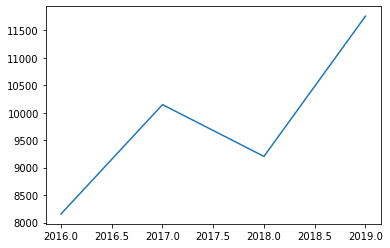

In [ ]:
merged_df

cal = merged_df[merged_df['County'] == "San Luis Obispo County"]
plt.plot(cal['year'], cal['worked_from_home'])